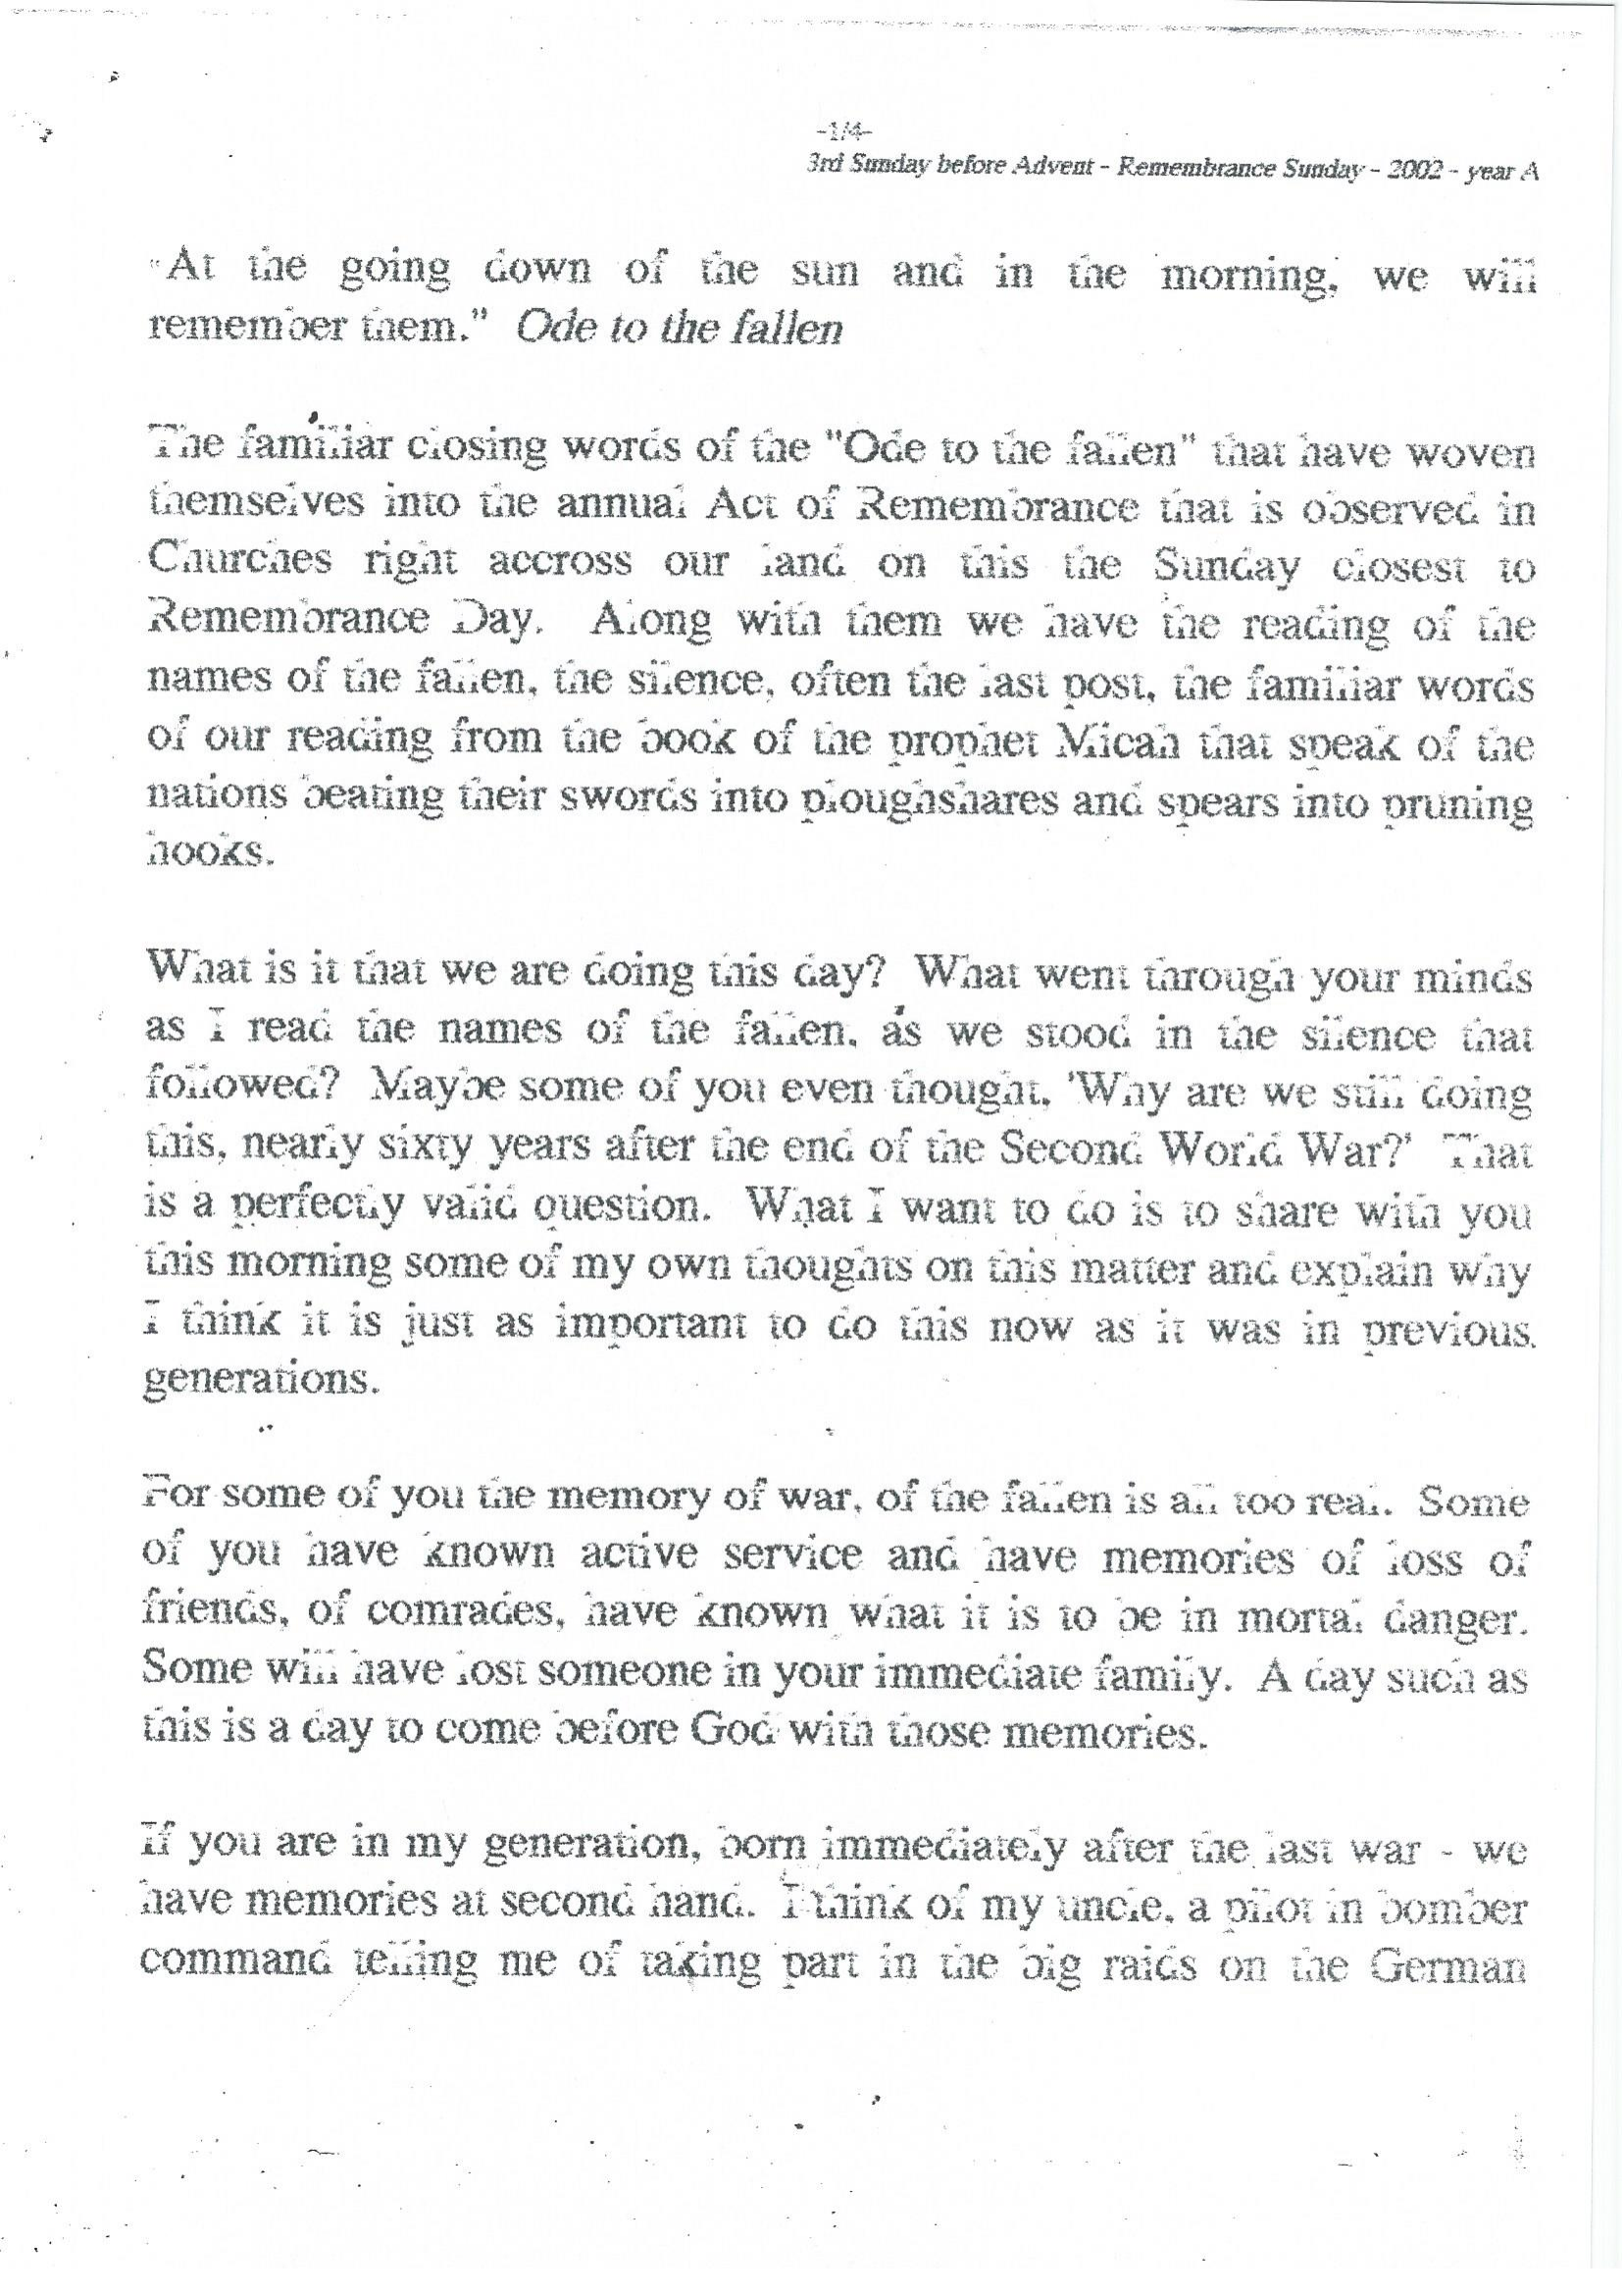

In [2]:
import pdf_to_txt as p
path = "../raw/sermons archive/Sermons/Special Occasions/Crucial Events/2002-11-11-Remembrance=3bfadvent-year-a.pdf"
images = p.convert_from_path(path)
images[0]

In [5]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "../project_key.json"

In [12]:
from google.cloud import vision
import cv2
import numpy

open_cv_image = numpy.array(images[0])
# Convert RGB to BGR
open_cv_image = open_cv_image[:, :, ::-1].copy()

roi = open_cv_image
roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
success, encoded_image = cv2.imencode('.jpg', roi)
roi_image = encoded_image.tobytes()
roi_image = vision.Image(content=roi_image)

client = vision.ImageAnnotatorClient()
response = client.text_detection(image=roi_image)



In [13]:
response

text_annotations {
  locale: "en"
  description: ".\n3rd Sunday before Advent-Remembrance Sunday - 2002-year A\n\"At the going down of the sun and in the morning, we will\nremember them.\" Ode to the fallen\nThe familiar closing words of the \"Ode to the fallen\" that have woven\nthemselves into the annual Act of Remembrance that is observed in\nChurches right accross our and on this the Sunday closest to\nRemembrance Day. Along with them we have the reading of the\nnames of the fauen, the silence, often the last post, the familiar words\nof our reading from the book of the prophet Micah that speak of the\nnations beating their swords into ploughshares and spears into pruning\nhooks.\nWhat is it that we are doing this day? What went through your minds\nas I read the names of the fa..en, as we stood in the silence that\nfollowed? Maybe some of you even thougat, \'Way are we su Going\nthis, nearly sixty years after the end of the Second World War?\' That\nis a perfectly valid question. W

In [16]:
type(response)

google.cloud.vision_v1.types.image_annotator.AnnotateImageResponse

In [18]:
print(response.text_annotations[0].description)

.
3rd Sunday before Advent-Remembrance Sunday - 2002-year A
"At the going down of the sun and in the morning, we will
remember them." Ode to the fallen
The familiar closing words of the "Ode to the fallen" that have woven
themselves into the annual Act of Remembrance that is observed in
Churches right accross our and on this the Sunday closest to
Remembrance Day. Along with them we have the reading of the
names of the fauen, the silence, often the last post, the familiar words
of our reading from the book of the prophet Micah that speak of the
nations beating their swords into ploughshares and spears into pruning
hooks.
What is it that we are doing this day? What went through your minds
as I read the names of the fa..en, as we stood in the silence that
followed? Maybe some of you even thougat, 'Way are we su Going
this, nearly sixty years after the end of the Second World War?' That
is a perfectly valid question. What I want to do is to share with you
this morning some of my own though